In [1]:
import xarray as xr
import numpy as np
from datetime import datetime, timedelta

from mapper_functions import plot_global_tight_pcm, plot_global_tight

In [2]:
expt_name = 'LS_OLv8_M36'

start_date = datetime(2003, 1, 1)
end_date = datetime(2006, 1, 1)

start_date_str = start_date.strftime('%Y%m%d')
end_date_str = end_date.strftime('%Y%m%d')

In [5]:
# Specify the path to the netCDF file
file_path = f'/discover/nobackup/amfox/Experiments/M21C_land_sweeper_DAv8_M36/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2001/M02/LS_DAv8_M36.catch_progn_incr.20010202.nc4'

# Open the netCDF file
dataset = xr.open_dataset(file_path)

# Extract the lon and lat variables
lon = dataset['lon']
lat = dataset['lat']

# Print the dimensions of the variables
print(f"Dimensions of lon: {lon.shape}")
print(f"Dimensions of lat: {lat.shape}")

Dimensions of lon: (112573,)
Dimensions of lat: (112573,)


In [6]:
# Open each of the saved files

#data_2000 = np.load(f'{expt_name}_{start_date_str}_{end_date_str}_obsfcstana_extend_datetime_2000.npz', allow_pickle=True)
#data_2001 = np.load(f'{expt_name}_{start_date_str}_{end_date_str}_obsfcstana_extend_datetime_2001.npz', allow_pickle=True)
#data_2002 = np.load(f'{expt_name}_{start_date_str}_{end_date_str}_obsfcstana_extend_datetime_2002.npz', allow_pickle=True)
data_2000 = np.load(f'{expt_name}_{start_date_str}_{end_date_str}_obsfcstana_extend_datetime_2003.npz', allow_pickle=True)
data_2001 = np.load(f'{expt_name}_{start_date_str}_{end_date_str}_obsfcstana_extend_datetime_2004.npz', allow_pickle=True)
data_2002 = np.load(f'{expt_name}_{start_date_str}_{end_date_str}_obsfcstana_extend_datetime_2005.npz', allow_pickle=True)
#data_2015 = np.load(f'{expt_name}_{start_date_str}_{end_date_str}_obsfcstana_extend_datetime_2015.npz', allow_pickle=True)
#data_2016 = np.load(f'{expt_name}_{start_date_str}_{end_date_str}_obsfcstana_extend_datetime_2016.npz', allow_pickle=True)
#data_2017 = np.load(f'{expt_name}_{start_date_str}_{end_date_str}_obsfcstana_extend_datetime_2017.npz', allow_pickle=True)
#data_2018 = np.load(f'{expt_name}_{start_date_str}_{end_date_str}_obsfcstana_extend_datetime_2018.npz', allow_pickle=True)
#data_2019 = np.load(f'{expt_name}_{start_date_str}_{end_date_str}_obsfcstana_extend_datetime_2019.npz', allow_pickle=True)
#data_2020 = np.load(f'{expt_name}_{start_date_str}_{end_date_str}_obsfcstana_extend_datetime_2020.npz', allow_pickle=True)


In [7]:
# Extract and combine the data from each of the files
date_time = np.concatenate((data_2000['date_time'], data_2001['date_time'], data_2002['date_time']))
obs_species = np.concatenate((data_2000['obs_species'], data_2001['obs_species'], data_2002['obs_species']))
obs_tilenum = np.concatenate((data_2000['obs_tilenum'], data_2001['obs_tilenum'], data_2002['obs_tilenum']))
obs_lon = np.concatenate((data_2000['obs_lon'], data_2001['obs_lon'], data_2002['obs_lon']))
obs_lat = np.concatenate((data_2000['obs_lat'], data_2001['obs_lat'], data_2002['obs_lat']))
obs_obs = np.concatenate((data_2000['obs_obs'], data_2001['obs_obs'], data_2002['obs_obs']))
obs_fcst = np.concatenate((data_2000['obs_fcst'], data_2001['obs_fcst'], data_2002['obs_fcst']))
obs_ana = np.concatenate((data_2000['obs_ana'], data_2001['obs_ana'], data_2002['obs_ana']))

In [8]:
# Calculate obs minus fcst
obs_minus_fcst = []
obs_minus_ana = []
for i in range(len(obs_obs)):
    obs_minus_fcst_chunk = obs_obs[i] - obs_fcst[i]
    obs_minus_fcst.append(obs_minus_fcst_chunk)
    obs_minus_ana_chunk = obs_obs[i] - obs_ana[i]
    obs_minus_ana.append(obs_minus_ana_chunk)
    

In [9]:
# Convert the lists to numpy arrays
obs_minus_fcst = np.array(obs_minus_fcst)
obs_minus_ana = np.array(obs_minus_ana)

In [10]:
# Find unique tilenum values
unique_tilenum = np.unique(obs_tilenum)

# Find the number of unique tilenum values
num_unique_tilenum = len(unique_tilenum)

# Print the number of unique tilenum values
print(f"Number of unique tilenum values: {num_unique_tilenum}")

Number of unique tilenum values: 111154


In [11]:
# Sort the arrays based on obs_tilenum
sort_indices = np.argsort(obs_tilenum)
sorted_obs_tilenum = obs_tilenum[sort_indices]
sorted_obs_species = obs_species[sort_indices]
sorted_obs_obs = obs_obs[sort_indices]
sorted_obs_fcst = obs_fcst[sort_indices]
sorted_obs_ana = obs_ana[sort_indices]
sorted_obs_minus_fcst = obs_minus_fcst[sort_indices]
sorted_obs_minus_ana = obs_minus_ana[sort_indices]
sorted_date_time = date_time[sort_indices]

# Find the unique tilenum values and their counts
unique_tilenum, counts = np.unique(sorted_obs_tilenum, return_counts=True)

# Calculate the indices where the groups should be split
split_indices = np.cumsum(counts)[:-1]

# Split the sorted arrays based on the split indices
obs_species_grouped = np.split(sorted_obs_species, split_indices)
obs_obs_grouped = np.split(sorted_obs_obs, split_indices)
obs_fcst_grouped = np.split(sorted_obs_fcst, split_indices)
obs_ana_grouped = np.split(sorted_obs_ana, split_indices)
obs_minus_fcst_grouped = np.split(sorted_obs_minus_fcst, split_indices)
obs_minus_ana_grouped = np.split(sorted_obs_minus_ana, split_indices)
date_time_grouped = np.split(sorted_date_time, split_indices)

In [12]:
# Print the length of obs_obs_grouped
print(f"Length of obs_obs_grouped: {len(obs_obs_grouped)}")

# Print the number of unique obs_species values
unique_species = np.unique(sorted_obs_species)
num_unique_species = len(unique_species)
print(f"Number of unique species: {num_unique_species}")
print(f"Unique species: {unique_species}")

Length of obs_obs_grouped: 111154
Number of unique species: 2
Unique species: [12. 13.]


In [13]:
# Run this cell if you have a multi-sensor experiment

# Find the number of observations for each tilenum
num_obs_smos = []
num_obs_smap = []
num_obs_ascat = []
num_obs_snow = []

for i in range(num_unique_tilenum):
    num_obs_smos.append(len(obs_obs_grouped[i][obs_species_grouped[i] < 5]))
    num_obs_smap.append(len(obs_obs_grouped[i][np.logical_and(obs_species_grouped[i] > 4, obs_species_grouped[i] < 9)]))
    num_obs_ascat.append(len(obs_obs_grouped[i][np.logical_and(obs_species_grouped[i] > 8, obs_species_grouped[i] < 12)]))
    num_obs_snow.append(len(obs_obs_grouped[i][obs_species_grouped[i] > 11]))
        
#Calculate the mean of the observations for each tilenum
mean_obs_smos = []
mean_obs_smap = []
mean_obs_ascat = []
mean_obs_snow = []

for i in range(num_unique_tilenum):
    mean_obs_smos.append(np.mean(obs_obs_grouped[i][obs_species_grouped[i] < 5]))
    mean_obs_smap.append(np.mean(obs_obs_grouped[i][np.logical_and(obs_species_grouped[i] > 4, obs_species_grouped[i] < 9)]))
    mean_obs_ascat.append(np.mean(obs_obs_grouped[i][np.logical_and(obs_species_grouped[i] > 8, obs_species_grouped[i] < 12)]))
    mean_obs_snow.append(np.mean(obs_obs_grouped[i][obs_species_grouped[i] > 11]))

# Calculate the max of the snow obs, fcst, and ana for each tilenum
max_obs_snow = []
max_fcst_snow = []
max_ana_snow = []

for i in range(num_unique_tilenum):
    obs_snow = obs_obs_grouped[i][obs_species_grouped[i] > 11]
    fcst_snow = obs_fcst_grouped[i][obs_species_grouped[i] > 11]
    ana_snow = obs_ana_grouped[i][obs_species_grouped[i] > 11]
    
    if obs_snow.size > 0:
        max_obs_snow.append(np.max(obs_snow))
    else:
        max_obs_snow.append(np.nan)
    
    if fcst_snow.size > 0:
        max_fcst_snow.append(np.max(fcst_snow))
    else:
        max_fcst_snow.append(np.nan)
    
    if ana_snow.size > 0:
        max_ana_snow.append(np.max(ana_snow))
    else:
        max_ana_snow.append(np.nan)

# Calculate the mean of the forecasts for each tilenum
mean_fcst_smos = []
mean_fcst_smap = []
mean_fcst_ascat = []
mean_fcst_snow = []

for i in range(num_unique_tilenum):
    mean_fcst_smos.append(np.mean(obs_fcst_grouped[i][obs_species_grouped[i] < 5]))
    mean_fcst_smap.append(np.mean(obs_fcst_grouped[i][np.logical_and(obs_species_grouped[i] > 4, obs_species_grouped[i] < 9)]))
    mean_fcst_ascat.append(np.mean(obs_fcst_grouped[i][np.logical_and(obs_species_grouped[i] > 8, obs_species_grouped[i] < 12)]))
    mean_fcst_snow.append(np.mean(obs_fcst_grouped[i][obs_species_grouped[i] > 11]))

# Calculate the mean of the analyses for each tilenum
mean_ana_smos = []
mean_ana_smap = []
mean_ana_ascat = []
mean_ana_snow = []

for i in range(num_unique_tilenum):
    mean_ana_smos.append(np.mean(obs_ana_grouped[i][obs_species_grouped[i] < 5]))
    mean_ana_smap.append(np.mean(obs_ana_grouped[i][np.logical_and(obs_species_grouped[i] > 4, obs_species_grouped[i] < 9)]))
    mean_ana_ascat.append(np.mean(obs_ana_grouped[i][np.logical_and(obs_species_grouped[i] > 8, obs_species_grouped[i] < 12)]))
    mean_ana_snow.append(np.mean(obs_ana_grouped[i][obs_species_grouped[i] > 11]))

# Calculate the mean of the obs minus fcst for each tilenum
mean_obs_minus_fcst_smos = []
mean_obs_minus_fcst_smap = []
mean_obs_minus_fcst_ascat = []
mean_obs_minus_fcst_snow = []

for i in range(num_unique_tilenum):
    mean_obs_minus_fcst_smos.append(np.mean(obs_minus_fcst_grouped[i][obs_species_grouped[i] < 5]))
    mean_obs_minus_fcst_smap.append(np.mean(obs_minus_fcst_grouped[i][np.logical_and(obs_species_grouped[i] > 4, obs_species_grouped[i] < 9)]))
    mean_obs_minus_fcst_ascat.append(np.mean(obs_minus_fcst_grouped[i][np.logical_and(obs_species_grouped[i] > 8, obs_species_grouped[i] < 12)]))
    mean_obs_minus_fcst_snow.append(np.mean(obs_minus_fcst_grouped[i][obs_species_grouped[i] > 11]))

# Calculate the mean of the obs minus ana for each tilenum
mean_obs_minus_ana_smos = []
mean_obs_minus_ana_smap = []
mean_obs_minus_ana_ascat = []
mean_obs_minus_ana_snow = []

for i in range(num_unique_tilenum):
    mean_obs_minus_ana_smos.append(np.mean(obs_minus_ana_grouped[i][obs_species_grouped[i] < 5]))
    mean_obs_minus_ana_smap.append(np.mean(obs_minus_ana_grouped[i][np.logical_and(obs_species_grouped[i] > 4, obs_species_grouped[i] < 9)]))
    mean_obs_minus_ana_ascat.append(np.mean(obs_minus_ana_grouped[i][np.logical_and(obs_species_grouped[i] > 8, obs_species_grouped[i] < 12)]))
    mean_obs_minus_ana_snow.append(np.mean(obs_minus_ana_grouped[i][obs_species_grouped[i] > 11]))

# Calculate the standard deviation of the obs_minus_fcst for each tilenum
std_obs_minus_fcst_smos = []
std_obs_minus_fcst_smap = []
std_obs_minus_fcst_ascat = []
std_obs_minus_fcst_snow = []

for i in range(num_unique_tilenum):
    std_obs_minus_fcst_smos.append(np.std(obs_minus_fcst_grouped[i][obs_species_grouped[i] < 5]))
    std_obs_minus_fcst_smap.append(np.std(obs_minus_fcst_grouped[i][np.logical_and(obs_species_grouped[i] > 4, obs_species_grouped[i] < 9)]))
    std_obs_minus_fcst_ascat.append(np.std(obs_minus_fcst_grouped[i][np.logical_and(obs_species_grouped[i] > 8, obs_species_grouped[i] < 12)]))
    std_obs_minus_fcst_snow.append(np.std(obs_minus_fcst_grouped[i][obs_species_grouped[i] > 11]))

# Calculate the standard deviation of the obs_minus_ana for each tilenum
std_obs_minus_ana_smos = []
std_obs_minus_ana_smap = []
std_obs_minus_ana_ascat = []
std_obs_minus_ana_snow = []

for i in range(num_unique_tilenum):
    std_obs_minus_ana_smos.append(np.std(obs_minus_ana_grouped[i][obs_species_grouped[i] < 5]))
    std_obs_minus_ana_smap.append(np.std(obs_minus_ana_grouped[i][np.logical_and(obs_species_grouped[i] > 4, obs_species_grouped[i] < 9)]))
    std_obs_minus_ana_ascat.append(np.std(obs_minus_ana_grouped[i][np.logical_and(obs_species_grouped[i] > 8, obs_species_grouped[i] < 12)]))
    std_obs_minus_ana_snow.append(np.std(obs_minus_ana_grouped[i][obs_species_grouped[i] > 11]))    

/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [14]:
# Assign lon and lat to each tilenum
lon_tilenum = []
lat_tilenum = []
for i in range(num_unique_tilenum):
    lon_tilenum.append(lon[int(unique_tilenum[i])])
    lat_tilenum.append(lat[int(unique_tilenum[i])])

# Convert the lists to numpy arrays
lon_tilenum = np.array(lon_tilenum)
lat_tilenum = np.array(lat_tilenum)

In [15]:
# Run this cell if you have a multi-sensor experiment
# Save all the calculated values to a file
np.savez(f'{expt_name}_{start_date_str}_{end_date_str}_obsfcstana_stats.npz',
         unique_tilenum=unique_tilenum,
         num_obs_smos=num_obs_smos,
         num_obs_smap=num_obs_smap,
         num_obs_ascat=num_obs_ascat,
         num_obs_snow=num_obs_snow,
         mean_obs_smos=mean_obs_smos,
         mean_obs_smap=mean_obs_smap,
         mean_obs_ascat=mean_obs_ascat,
         mean_obs_snow=mean_obs_snow,
         mean_fcst_smos=mean_fcst_smos,
         mean_fcst_smap=mean_fcst_smap,
         mean_fcst_ascat=mean_fcst_ascat,
         mean_fcst_snow=mean_fcst_snow,
         mean_ana_smos=mean_ana_smos,
         mean_ana_smap=mean_ana_smap,
         mean_ana_ascat=mean_ana_ascat,
         mean_ana_snow=mean_ana_snow,
         mean_obs_minus_fcst_smos=mean_obs_minus_fcst_smos,
         mean_obs_minus_fcst_smap=mean_obs_minus_fcst_smap,
         mean_obs_minus_fcst_ascat=mean_obs_minus_fcst_ascat,
         mean_obs_minus_fcst_snow=mean_obs_minus_fcst_snow,
         mean_obs_minus_ana_smos=mean_obs_minus_ana_smos,
         mean_obs_minus_ana_smap=mean_obs_minus_ana_smap,
         mean_obs_minus_ana_ascat=mean_obs_minus_ana_ascat,
         mean_obs_minus_ana_snow=mean_obs_minus_ana_snow,
         std_obs_minus_fcst_smos=std_obs_minus_fcst_smos,
         std_obs_minus_fcst_smap=std_obs_minus_fcst_smap,
         std_obs_minus_fcst_ascat=std_obs_minus_fcst_ascat,
         std_obs_minus_fcst_snow=std_obs_minus_fcst_snow,
         std_obs_minus_ana_smos=std_obs_minus_ana_smos,
         std_obs_minus_ana_smap=std_obs_minus_ana_smap,
         std_obs_minus_ana_ascat=std_obs_minus_ana_ascat,
         std_obs_minus_ana_snow=std_obs_minus_ana_snow,
         max_obs_snow=max_obs_snow,
         max_fcst_snow=max_fcst_snow,
         max_ana_snow=max_ana_snow,
         lon_tilenum=lon_tilenum,
         lat_tilenum=lat_tilenum)

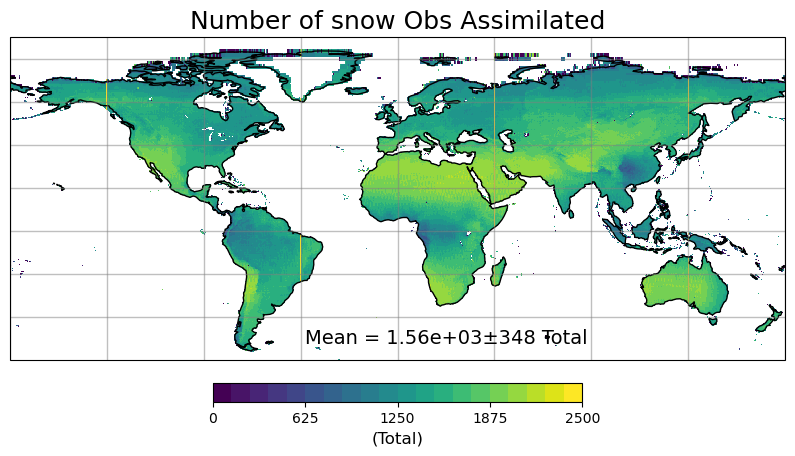

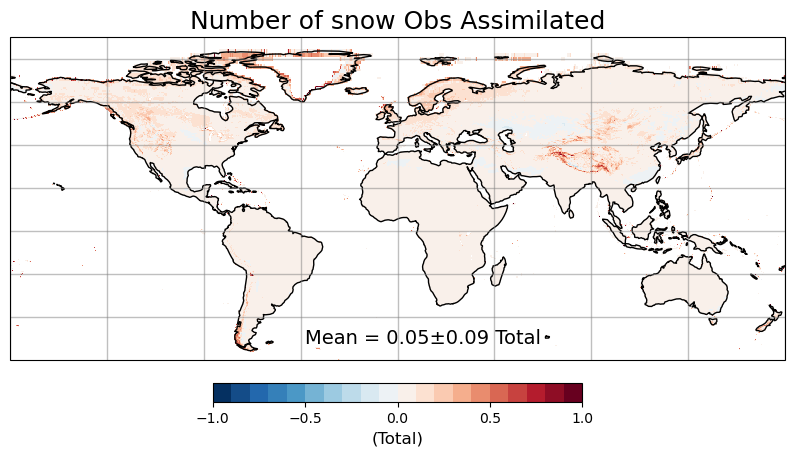

In [16]:

test_array = num_obs_snow
test_array = np.array(test_array)
#test_array[test_array < 1] = -999
    
obarray = np.empty([num_unique_tilenum, 3])
obarray[:, 1] = lon_tilenum
obarray[:, 2] = lat_tilenum
obarray[:, 0] = test_array
   
plot_global_tight_pcm(obarray,False, True,'Number of snow Obs Assimilated','Total',0,2500)

test_array = mean_obs_minus_fcst_snow
test_array = np.array(test_array)
#test_array[test_array < 1] = -999
    
obarray = np.empty([num_unique_tilenum, 3])
obarray[:, 1] = lon_tilenum
obarray[:, 2] = lat_tilenum
obarray[:, 0] = test_array
   
plot_global_tight_pcm(obarray,False, True,'Number of snow Obs Assimilated','Total',-1,1)
